<a href="https://colab.research.google.com/github/LiviaAniely/Aplica-es-do-Processamento-de-Linguagem-Natural/blob/main/LiviaA_An%C3%A1lise_de_Sentimentos_em_Reviews_do_IMDb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Análise de Sentimentos em Reviews do IMDb

O principal objetivo desta tarefa é aplicar três modelos de aprendizado de máquina distintos - Regressão Linear, Naive Bayes e Perceptron - para realizar a análise de sentimento em um conjunto de dados de *reviews* de usuários sobre filmes no IMDb. Este conjunto de dados inclui avaliações de texto juntamente com rótulos de sentimento correspondentes (positivo ou negativo) para a aprendizagem supervisionada.

## Bibliotecas

In [ ]:
# Para a leitura dos dados
import pandas as pd

# Manipulação de texto
import nltk.corpus
from nltk                             import SnowballStemmer
from nltk.tokenize                    import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

from nltk.corpus import stopwords
stop_words = stopwords.words('english')

# Prepraração dos dados
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.model_selection          import train_test_split

# Modelos de classificação
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.naive_bayes import MultinomialNB

# Avaliação
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Leitura dos dados

In [ ]:
df = pd.read_csv('https://gist.githubusercontent.com/issilva5/44c9406a85b0fed0d62668752cc31b09/raw/49e01d2e8011bdd83d0bc835a518e398ae319303/movie_reviews.csv')
df

,content,sentiment
0,now i wont deny that when i purchased this off...,neg
1,the saddest thing about this tribute is that a...,neg
2,last night i decided to watch the prequel or s...,neg
3,i have to admit that i liked the first half of...,neg
4,i was not impressed about this film especially...,neg
...,...,...
24995,this film is fun if your a person who likes a ...,pos
24996,after seeing this film i feel like i know just...,pos
24997,first this deserves about stars due to acting ...,neg
24998,if you like films that ramble with little plot...,neg


Os dados estão distribuídos em duas classes:

In [ ]:
df.groupby('sentiment').count()

,content
sentiment,
neg,12500
pos,12500


A seguir, criaremos uma lista com o texto.

In [ ]:
corpus = df['content'].tolist()
print(len(corpus))

25000


## Limpeza dos dados

Antes de aplicar modelos de aprendizado de máquina, é necessário limpar e pré-processar os dados textuais:

- Tokenização
- Remoção de palavras muito pequenas (<= 2) ou muito grandes (>= 15).
- Remoção de stopwords.
- Stemming.

In [ ]:
def remove_palavras_pequenas_grandes(tokens):
  res = []

  for word in tokens:
    if(2  < len(word) <= 15):
      res.append(word)

  return res

def remove_stopwords(tokens):
  return [token for token in tokens if token not in stop_words]

def stemming(tokens):
  stemmer = SnowballStemmer('english')
  return [stemmer.stem(token) for token in tokens]

In [ ]:
def process_corpus(corpus):
  corpus_processed = []
  for document in corpus:
    tokens = word_tokenize(document)
    tokens = remove_palavras_pequenas_grandes(tokens)
    tokens = remove_stopwords(tokens)
    tokens = stemming(tokens)
    corpus_processed.append(" ".join(tokens))
  return corpus_processed

corpus_processed = process_corpus(corpus)

In [ ]:
print(len(corpus_processed))

25000


## Preparando os dados para os modelos

Primeiramente, será realizado a vetorização TF-IDF dos dados.

In [ ]:
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus_processed)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names_out())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df

25000 rows


,aaa,aaaaaaah,aaaaah,aaaaatchkah,aaaahhhhhhh,aaaand,aaaarrgh,aaah,aaand,aaargh,...,était,étcother,éveri,êxtase,ísnt,østbye,über,überannoy,überspi,üvegtigri
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
y = df['sentiment'].to_numpy()
print(len(y))

25000


Agora é feito a partição treino e teste dos dados.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8)

## Treinando modelos

Instanciação e treino dos três modelos (Regressão Logística, Naive Bayes e Perceptron).

In [ ]:
#Regressão logística
clr = LogisticRegression(random_state=0).fit(X_train, y_train)

#Naive Bayes
cnb = MultinomialNB().fit(X_train, y_train)

#Perceptron
p = Perceptron(tol=1e-3, random_state=0).fit(X_train, y_train)

## Avaliação dos modelos

Realização das predições para cada um dos três modelos.

In [ ]:
clr.predict(X_test)[:10]

array(['neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'neg', 'pos', 'pos',
       'pos'], dtype=object)

In [ ]:
cnb.predict(X_test)[:10]

array(['neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'neg', 'pos', 'pos',
       'pos'], dtype='<U3')

In [ ]:
cnb.predict(X_test)[:10]

array(['neg', 'neg', 'neg', 'pos', 'pos', 'neg', 'neg', 'pos', 'pos',
       'pos'], dtype='<U3')

- Plot da matriz de confusão para cada modelo.

In [ ]:
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, labels=None) -> None:
    cm = confusion_matrix(y_true, y_pred, labels=labels)

    plt.figure(figsize=(len(labels), len(labels)))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.show()

1. Regressão Logística:

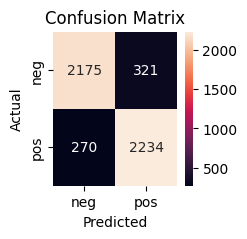

In [ ]:
plot_confusion_matrix(y_test, clr.predict(X_test), labels=['neg', 'pos'])

2. Naive Bayes:


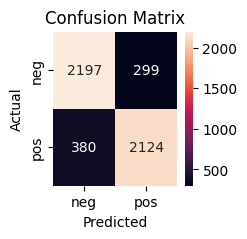

In [ ]:
plot_confusion_matrix(y_test, cnb.predict(X_test), labels=['neg', 'pos'])

3. Perceptron:

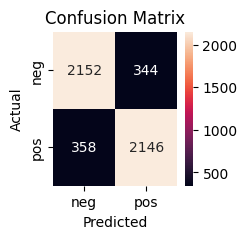

In [ ]:
plot_confusion_matrix(y_test, p.predict(X_test), labels=['neg', 'pos'])

- Métricas (acurácia, recall, precision, f1-score) para cada uma das predições.

In [ ]:
print(classification_report(y_test, clr.predict(X_test)))

              precision    recall  f1-score   support

         neg       0.89      0.87      0.88      2496
         pos       0.87      0.89      0.88      2504

    accuracy                           0.88      5000
   macro avg       0.88      0.88      0.88      5000
weighted avg       0.88      0.88      0.88      5000



In [ ]:
print(classification_report(y_test, cnb.predict(X_test)))

              precision    recall  f1-score   support

         neg       0.85      0.88      0.87      2496
         pos       0.88      0.85      0.86      2504

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



In [ ]:
print(classification_report(y_test, p.predict(X_test)))

              precision    recall  f1-score   support

         neg       0.86      0.86      0.86      2496
         pos       0.86      0.86      0.86      2504

    accuracy                           0.86      5000
   macro avg       0.86      0.86      0.86      5000
weighted avg       0.86      0.86      0.86      5000



#### Perguntas

***Discussão sobre os resultados do modelo considerando as matrizes de confusão e as métricas calculadas.***

Ao analisar as matrizes de confusão de cada um dos modelos e suas métricas, podemos compreender como os modelos funcionam para o banco de dados usado.
Os 3 modelos produziram acurácias parecidas e altas, o que representam um resultado bom. No entanto, o que se mostrou mais adequado foi a regressão logística, que produziu uma acurácia de 88%, ligeiramente maior que os outros 2.

## Interpretando os modelos

Uma subárea importante da aprendizagem de máquina é a interpretação dos modelos.

Nesta parte do laboratório, serão implementadas funções para facilitar a interpretação dos modelos treinados.

### Implementando funções auxiliares

A seguir, serão implementadas duas funções;

A primeira delas **recupera_palavras_positivas** retornará as top-20 palavras que mais contribuem para a classificação do texto como positivo. A segunda **recupera_palavras_negativas** deve fazer o equivalente para a classificação negativa.

Os modelos de Regressão Logística e Perceptron tem um parâmetro chamado ***coef_***, este parâmetro retorna o peso de cada feature (palavra) tem no modelo. Palavras com peso positivo influenciam para a classificação positiva, e palavras com peso negativo fazem o inverso. O valor desse parâmetro tem a dimensão (1, n_features).

Já o modelo Naive Bayes tem um parâmetro chamado ***feature_log_prob_***. Este parâmetro retorna o log das probabilidades de cada palavra aparecer no texto dada uma classe. O valor desse parâmetro tem a dimensão (2, n_features), de modo que a posição 0 corresponde as probabilidades para a classe negativa e a posição para a classe positiva. Quanto maior for a probabilidade de uma palavra, maior podemos dizer que é sua influência na classificação.

Para acessar o nomes das features em ordem utilize o método **get_feature_names_out** do vetorizador construído.

Ambas as funções retornam uma lista de tuplas (string, float), ou seja, (palavra, peso).

In [ ]:
words = final_df.columns

def recupera_palavras_positivas(model, type, words):

  if(type.upper() in ['CLR','P']):
    coe = model.coef_[0]

  elif(type.upper() == 'CNB'):
    coe = model.feature_log_prob_[1] #classe positiva

  #casa cada palavra com o seu coeficiente
  res = {words[i]:coe[i] for i in range(len(words)-1)}

  #ordena os coeficientes em ordem decrescente
  sort_res = sorted(res.items(), key=lambda x: x[1],reverse=True)

  return sort_res[0:20]

def recupera_palavras_negativas(model,type, words):

  if(type.upper() in ['CLR','P']):
    coef = model.coef_
    res = {words[i]:coef[0][i] for i in range(len(words)-1)}
    sort_res = sorted(res.items(), key=lambda x: x[1])

  elif(type.upper() == 'CNB'):
    prob = model.feature_log_prob_[0] #classe negativa
    res = {words[i]:prob[i] for i in range(len(words)-1)}
    sort_res = sorted(res.items(), key=lambda x: x[1],reverse=True)

  return sort_res[0:20]

In [ ]:
print(recupera_palavras_positivas(clr, 'clr',words))
print(recupera_palavras_negativas(clr, 'clr',words))
print() #problema com CNB
print(recupera_palavras_positivas(cnb, 'cnb',words))
print(recupera_palavras_negativas(cnb, 'cnb',words))
print()
print(recupera_palavras_positivas(p, 'p',words))
print(recupera_palavras_negativas(p, 'p',words))

[('great', 6.700532393366133), ('excel', 6.346871058762035), ('perfect', 5.324185476588435), ('best', 4.670640294265859), ('love', 4.670107081774338), ('enjoy', 4.386159050124895), ('favorit', 4.319664774585298), ('beauti', 3.7473890001100836), ('fun', 3.6726968057617606), ('well', 3.616608506486758), ('definit', 3.4500163851119634), ('surpris', 3.427674128167023), ('brilliant', 3.426940710243986), ('amaz', 3.3393528622526003), ('today', 3.1366989667482525), ('also', 3.073169349746283), ('still', 2.8856619008191147), ('world', 2.806109474663729), ('entertain', 2.768062369716324), ('superb', 2.7629315529428373)]
[('worst', -8.606773854197312), ('bad', -7.621379854151696), ('wast', -7.109243986119701), ('poor', -6.639644865187529), ('aw', -6.068340545864691), ('bore', -5.77276765294847), ('noth', -4.568092521301232), ('terribl', -4.5056163317979046), ('disappoint', -4.318030003464679), ('suppos', -4.148495317877198), ('wors', -4.101732611627522), ('fail', -3.979456628930004), ('horribl',

### Visualizando e interpretando

Visualizar uma nuvem de palavras do retorno das funções.

In [ ]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_wordcloud(lista_de_tuplas):
    # Cria um dicionário a partir da lista de tuplas
    palavra_freq = {t[0]: t[1] for t in lista_de_tuplas}

    # Cria a WordCloud
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(palavra_freq)

    # Plota a WordCloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

#### Palavras positivas

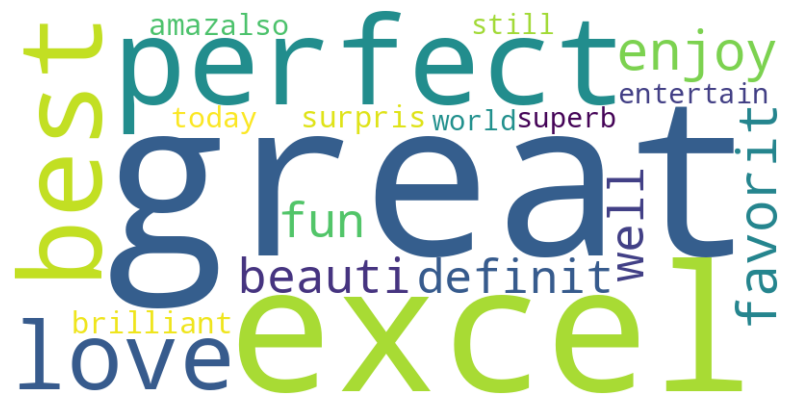

In [ ]:
#Regressão Logística
plot_wordcloud(recupera_palavras_positivas(clr, 'clr',words))


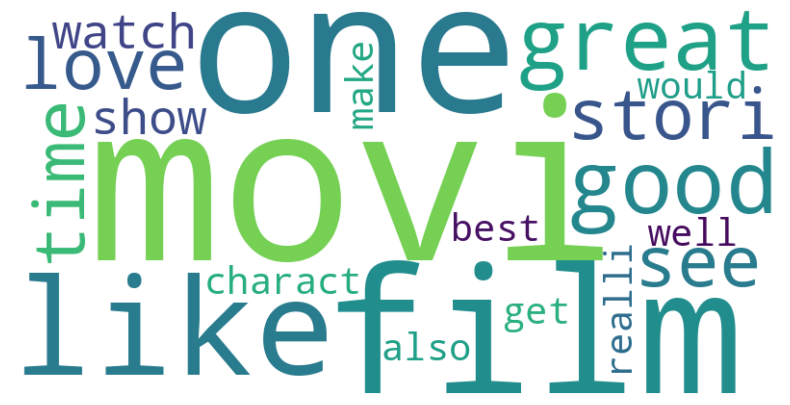

In [ ]:
#Naive Bayes
plot_wordcloud(recupera_palavras_positivas(cnb, 'cnb',words))


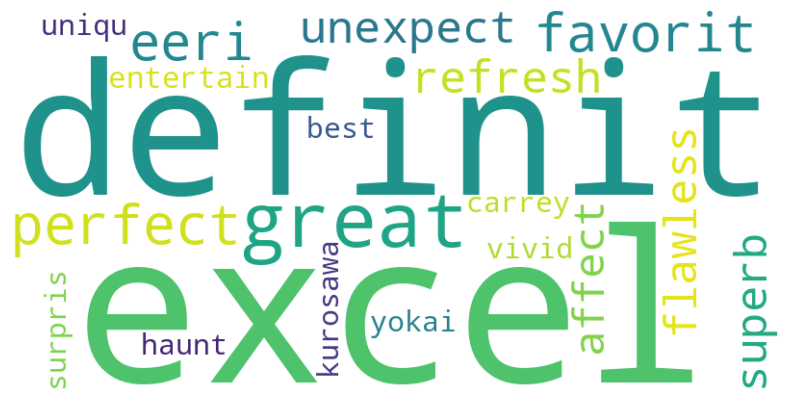

In [ ]:
#Perceptron
plot_wordcloud(recupera_palavras_positivas(p, 'p',words))


#### Palavras negativas

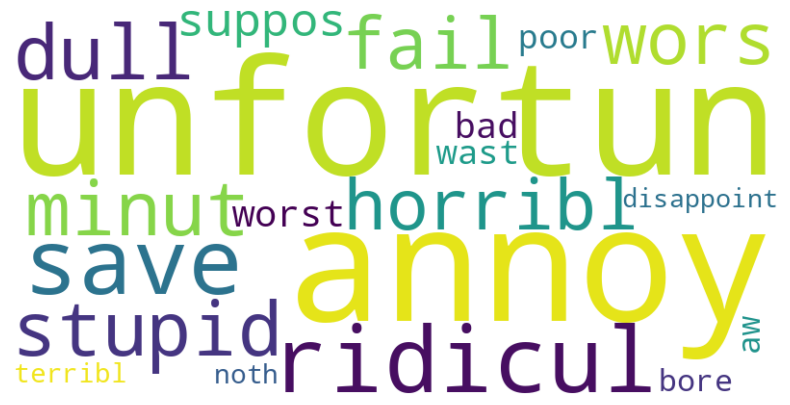

In [ ]:
#Regressão Logística
plot_wordcloud(recupera_palavras_negativas(clr, 'clr',words))

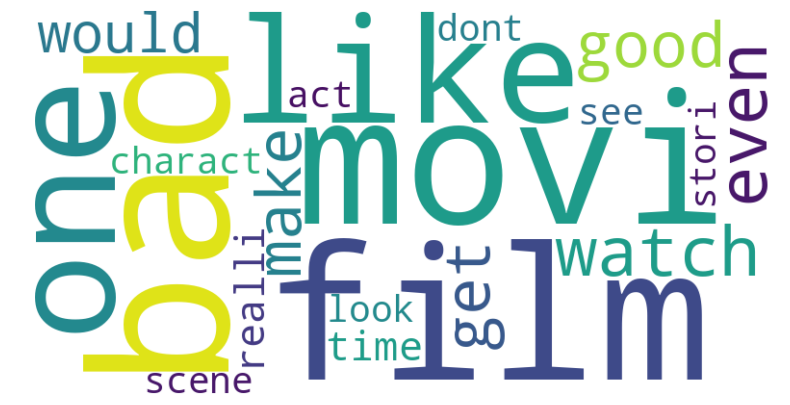

In [ ]:
#Naive Bayes
plot_wordcloud(recupera_palavras_negativas(cnb, 'cnb',words))

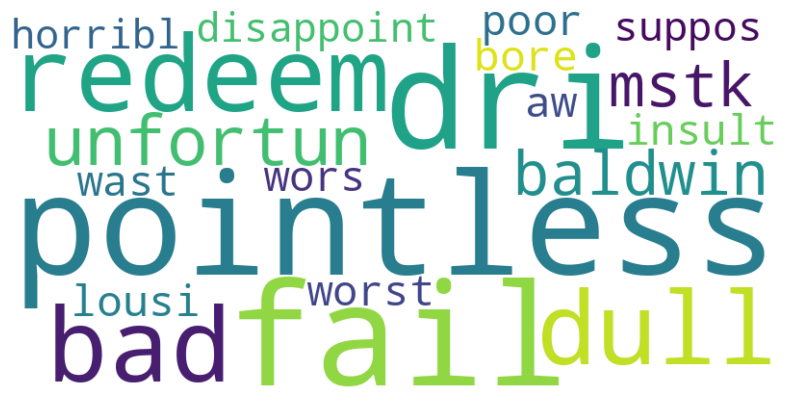

In [ ]:
#Perceptron
plot_wordcloud(recupera_palavras_negativas(p, 'p',words))

#### Perguntas

**1. Analisando as nuvens de palavras positivas de cada modelo, é possível identificar que as palavras estão associadas à um sentimento positivo? Dê exemplos.**

As nuvens positivas originadas da regressão logística e do perceptron geraram palavras associadas a um sentimento positivo e boa avaliação.
Em contrapartida, a nuvem do naive bayes tem palavras positivas também, porém as que mais se destacaram "film" e "movie" não tem esse peso necessariamente positivo.

**2. Analisando as nuvens de palavras negativas de cada modelo, é possível identificar que as palavras estão associadas à um sentimento negativo? Dê exemplos.**

As nuvens negativas originadas da regressão logística e do perceptron geraram palavras associadas a um sentimento negativo e avaliações ruins.
Em contrapartida, a nuvem do naive bayes tem palavras negativas também, porém as que mais se destacaram "film" e "movie" não tem esse peso necessariamente negativo.

**3. Considerando as métricas calculadas e a análise acima, qual modelo você acredita ser o melhor na tarefa? Por quê?**

Analisando os 3 modelos, o que se saiu melhor foi o de regressão logística visto que obteve uma acurácia maior que a dos outros 2, além de uma nuvem de palavras e matriz de confusão bem equilibradas e coerentes.

## Testando mais modelos

Até então no exercício, foram utilizados três modelos de classificação, entretanto existem muitos outros disponíveis no sklearn. Abaixo, será usado o [Decision Tree](https://scikit-learn.org/stable/modules/tree.html#classification), ou Árvore de decisão, para treinar com o mesmo banco de dados.


In [ ]:
# Importação do modelo que será utilizado
from sklearn import tree

In [ ]:
# Treino do modelo escolhido

cdt = tree.DecisionTreeClassifier()
cdt = cdt.fit(X_train,y_train)

[Text(0.7685083800471858, 0.9871794871794872, 'x[83565] <= 0.033\ngini = 0.488\nsamples = 15559\nvalue = [6564, 8995]'),
 Text(0.7370470954449853, 0.9786324786324786, 'x[81355] <= 0.028\ngini = 0.477\nsamples = 14645\nvalue = [5742, 8903]'),
 Text(0.6879355965754941, 0.9700854700854701, 'x[30614] <= 0.02\ngini = 0.464\nsamples = 13885\nvalue = [5072, 8813]'),
 Text(0.6227538420797203, 0.9615384615384616, 'x[4834] <= 0.009\ngini = 0.486\nsamples = 10333\nvalue = [4293, 6040]'),
 Text(0.5979698968945444, 0.9529914529914529, 'x[57437] <= 0.029\ngini = 0.48\nsamples = 9943\nvalue = [3965, 5978]'),
 Text(0.5661262134539939, 0.9444444444444444, 'x[8616] <= 0.026\ngini = 0.471\nsamples = 9396\nvalue = [3561, 5835]'),
 Text(0.5305717091144726, 0.9358974358974359, 'x[51658] <= 0.031\ngini = 0.46\nsamples = 8818\nvalue = [3158, 5660]'),
 Text(0.4991110823636759, 0.9273504273504274, 'x[71758] <= 0.033\ngini = 0.446\nsamples = 8039\nvalue = [2698, 5341]'),
 Text(0.48050843861060993, 0.918803418803

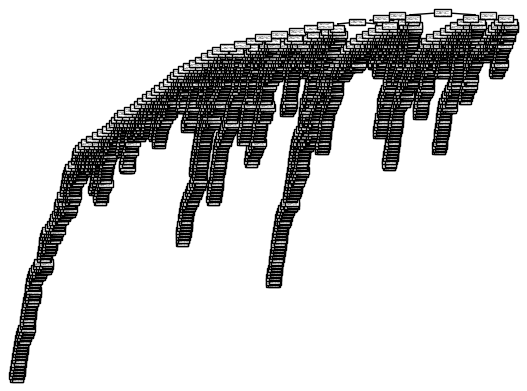

In [ ]:
tree.plot_tree(cdt)[1:20]

In [ ]:
# Previsão dos resultados
y_pred = cdt.predict(X_test)

In [ ]:
# Avaliação das métricas
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

         neg       0.71      0.72      0.71      2496
         pos       0.72      0.70      0.71      2504

    accuracy                           0.71      5000
   macro avg       0.71      0.71      0.71      5000
weighted avg       0.71      0.71      0.71      5000



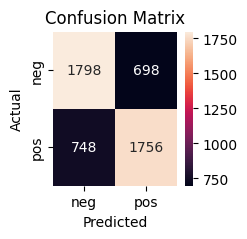

In [ ]:
# Matriz de confusão
plot_confusion_matrix(y_test, y_pred, labels=['neg', 'pos'])

### Perguntas

**1. Explique brevemente como o modelo que você escolheu funciona (a documentação do sklearn pode servir de fonte para esta resposta).**

Árvores de decisão (DTs) são um método de aprendizagem supervisionado não paramétrico usado para classificação e regressão. Assim, pode ser usado para prever categorias discretas (sim ou não, por exemplo) e para prever valores numéricos. O objetivo é criar um modelo que preveja o valor de uma variável alvo, aprendendo regras de decisão simples inferidas a partir dos recursos dos dados. Uma árvore pode ser vista como uma aproximação constante por partes.

**2. Como foi o desempenho do modelo escolhido em relação aos demais modelos?**

Foi consideravelmente menor, visto que os 3 usados nessa avaliação obtiveram acurácias acima de 85% e este modelo obteve 71%.